<a href="https://colab.research.google.com/github/ylylime/MAT167-SS2/blob/main/Question1_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install numpy opencv-python


In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the images
image1 = cv2.imread('img1.jpg')  # Replace 'image1.jpg' with the path to your first image
image2 = cv2.imread('img2.jpg')  # Replace 'image2.jpg' with the path to your second image
image3 = cv2.imread('img3.png')  # Replace 'image3.jpg' with the path to your third image

# Convert the images to grayscale if needed
# image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
# image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

# Convert the images to numpy matrices
matrix1 = np.array(image1)
matrix2 = np.array(image2)
matrix3 = np.array(image3)

# Print the shapes of the matrices (height, width, channels)
print("Matrix 1 shape:", matrix1.shape)
print("Matrix 2 shape:", matrix2.shape)
print("Matrix 3 shape:", matrix3.shape)


Matrix 1 shape: (635, 640, 3)
Matrix 2 shape: (600, 600, 3)
Matrix 3 shape: (512, 512, 3)


In [26]:
blue_channel = image1[:, :, 0]  # Blue channel
green_channel = image1[:, :, 1]  # Green channel
red_channel = image1[:, :, 2]  # Red channel


In [27]:
blue_channel

array([[217, 225, 213, ..., 220, 229, 220],
       [218, 226, 212, ..., 212, 217, 210],
       [216, 225, 212, ..., 205, 203, 198],
       ...,
       [ 86,  82,  83, ...,  54,  40, 140],
       [ 82,  84,  86, ...,  56,  47, 146],
       [ 77,  89,  88, ...,  55,  53, 149]], dtype=uint8)

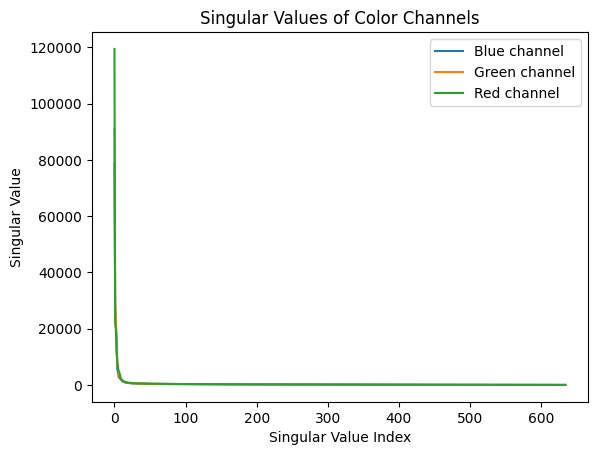

In [28]:
U_b, S_b, Vt_b = np.linalg.svd(blue_channel)
U_g, S_g, Vt_g = np.linalg.svd(green_channel)
U_r, S_r, Vt_r = np.linalg.svd(red_channel)

# Plot the Singular Values
plt.plot(S_b, label='Blue channel')
plt.plot(S_g, label='Green channel')
plt.plot(S_r, label='Red channel')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Singular Values of Color Channels')
plt.legend()
plt.show()

In [29]:
# Calculate the sum of singular values for each channel
sum_singular_values_blue = np.sum(S_b)
sum_singular_values_green = np.sum(S_g)
sum_singular_values_red = np.sum(S_r)
print("Sum of singular values for Blue channel:", sum_singular_values_blue)
print("Sum of singular values for Green channel:", sum_singular_values_green)
print("Sum of singular values for Red channel:", sum_singular_values_red)

Sum of singular values for Blue channel: 264534.2432879767
Sum of singular values for Green channel: 281853.9899237645
Sum of singular values for Red channel: 308325.98932999047


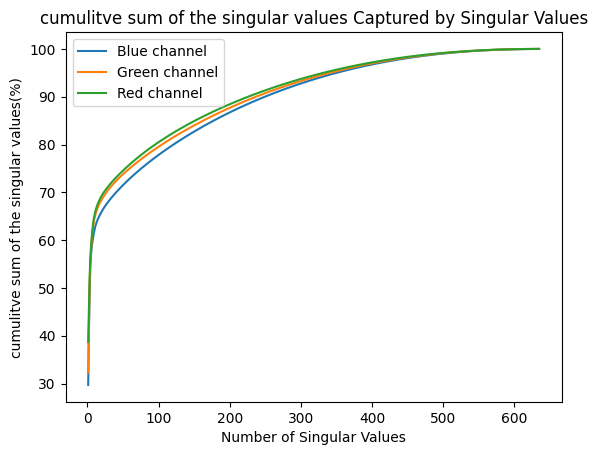

In [30]:

# Calculate the cumulative sum of singular values for each channel
cumulative_sum_blue = np.cumsum(S_b)
cumulative_sum_green = np.cumsum(S_g)
cumulative_sum_red = np.cumsum(S_r)

# Calculate the total sum of singular values for each channel
total_sum_blue = np.sum(S_b)
total_sum_green = np.sum(S_g)
total_sum_red = np.sum(S_r)

# Calculate the percentage of energy captured by the first n singular values
n_values = np.arange(1, len(S_b) + 1)
percentage_blue = cumulative_sum_blue / total_sum_blue * 100
percentage_green = cumulative_sum_green / total_sum_green * 100
percentage_red = cumulative_sum_red / total_sum_red * 100

# Plot the percentage of energy captured
plt.plot(n_values, percentage_blue, label='Blue channel')
plt.plot(n_values, percentage_green, label='Green channel')
plt.plot(n_values, percentage_red, label='Red channel')
plt.xlabel('Number of Singular Values')
plt.ylabel('cumulitve sum of the singular values(%)')
plt.title('cumulitve sum of the singular values Captured by Singular Values')
plt.legend()
plt.show()

In [31]:
threshold_value_blue = 0.8 * sum_singular_values_blue
threshold_value_green = 0.8 * sum_singular_values_green
threshold_value_red = 0.8 * sum_singular_values_red

# Find the number of singular values needed to reach the threshold for each channel
def find_num_singular_values(singular_values, threshold_value):
    cumulative_sum = 0
    num_singular_values = 0
    for singular_value in singular_values:
        cumulative_sum += singular_value
        num_singular_values += 1
        if cumulative_sum >= threshold_value:
            break
    return num_singular_values

num_singular_values_blue = find_num_singular_values(S_b, threshold_value_blue)
num_singular_values_green = find_num_singular_values(S_g, threshold_value_green)
num_singular_values_red = find_num_singular_values(S_r, threshold_value_red)

print("Number of singular values for Blue channel:", num_singular_values_blue)
print("Number of singular values for Green channel:", num_singular_values_green)
print("Number of singular values for Red channel:", num_singular_values_red)


Number of singular values for Blue channel: 121
Number of singular values for Green channel: 105
Number of singular values for Red channel: 96


In [32]:
 U_b.shape
 S_b.shape
 Vt_b.shape

(640, 640)

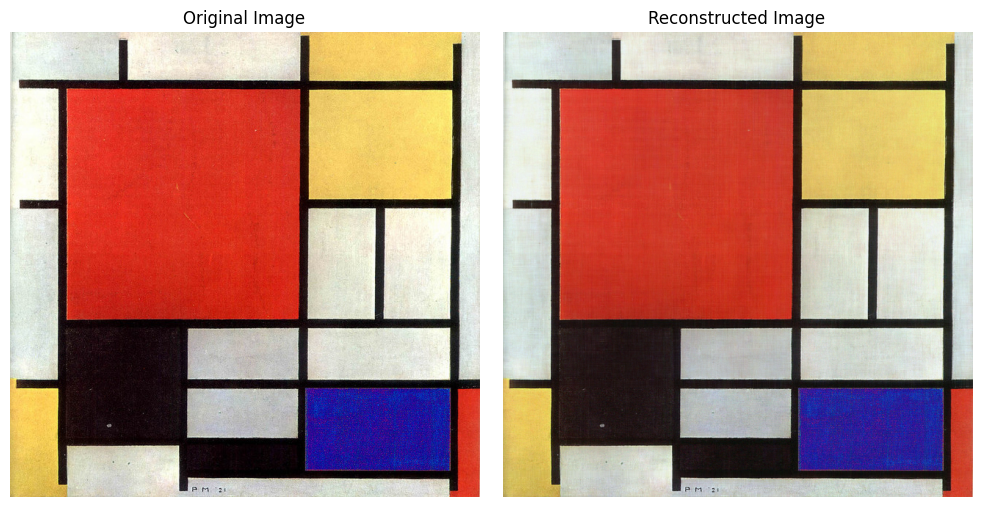

In [33]:
# so I think 121 is the best value we can apply
# Retain the first 121 singular values for each channel
#num_singular_values = 121

U_b = U_b[:, :num_singular_values_blue]
S_b = S_b[:num_singular_values_blue]
Vt_b = Vt_b[:num_singular_values_blue, :]

U_g = U_g[:, :num_singular_values_green]
S_g = S_g[:num_singular_values_green]
Vt_g = Vt_g[:num_singular_values_green, :]

U_r = U_r[:, :num_singular_values_red]
S_r = S_r[:num_singular_values_red]
Vt_r = Vt_r[:num_singular_values_red, :]

# Reconstruct the color matrices using U, S, and Vt
reconstructed_blue_channel = U_b @ np.diag(S_b) @ Vt_b
reconstructed_green_channel = U_g @ np.diag(S_g) @ Vt_g
reconstructed_red_channel = U_r @ np.diag(S_r) @ Vt_r


reconstructed_blue_channel = (reconstructed_blue_channel - np.min(reconstructed_blue_channel)) / (np.max(reconstructed_blue_channel) - np.min(reconstructed_blue_channel))
reconstructed_green_channel = (reconstructed_green_channel - np.min(reconstructed_green_channel)) / (np.max(reconstructed_green_channel) - np.min(reconstructed_green_channel))
reconstructed_red_channel = (reconstructed_red_channel - np.min(reconstructed_red_channel)) / (np.max(reconstructed_red_channel) - np.min(reconstructed_red_channel))
# Stack the color channels to form the reconstructed color image
reconstructed_image = np.stack(
    (reconstructed_red_channel, reconstructed_green_channel, reconstructed_blue_channel),
    axis=-1
).astype(np.float32)  # Convert to float32

# Plot the original and reconstructed images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image)
plt.axis('off')

plt.tight_layout()
plt.show()

In [34]:
blue_channel = image2[:, :, 0]  # Blue channel
green_channel = image2[:, :, 1]  # Green channel
red_channel = image2[:, :, 2]  # Red channel
U_b, S_b, Vt_b = np.linalg.svd(blue_channel)
U_g, S_g, Vt_g = np.linalg.svd(green_channel)
U_r, S_r, Vt_r = np.linalg.svd(red_channel)
# Calculate the sum of singular values for each channel
sum_singular_values_blue = np.sum(S_b)
sum_singular_values_green = np.sum(S_g)
sum_singular_values_red = np.sum(S_r)
threshold_value_blue = 0.8 * sum_singular_values_blue
threshold_value_green = 0.8 * sum_singular_values_green
threshold_value_red = 0.8 * sum_singular_values_red
num_singular_values_blue = find_num_singular_values(S_b, threshold_value_blue)
num_singular_values_green = find_num_singular_values(S_g, threshold_value_green)
num_singular_values_red = find_num_singular_values(S_r, threshold_value_red)

print("Number of singular values for Blue channel:", num_singular_values_blue)
print("Number of singular values for Green channel:", num_singular_values_green)
print("Number of singular values for Red channel:", num_singular_values_red)

Number of singular values for Blue channel: 62
Number of singular values for Green channel: 50
Number of singular values for Red channel: 47


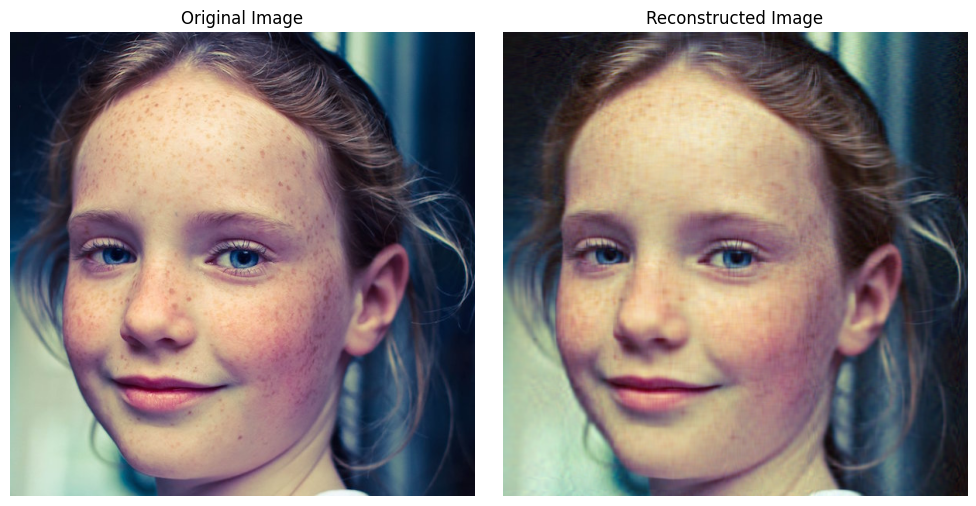

In [35]:
# so I think 62 is the best value we can apply
# Retain the first 62 singular values for each channel
#num_singular_values = 62
U_b = U_b[:, :num_singular_values_blue]
S_b = S_b[:num_singular_values_blue]
Vt_b = Vt_b[:num_singular_values_blue, :]

U_g = U_g[:, :num_singular_values_green]
S_g = S_g[:num_singular_values_green]
Vt_g = Vt_g[:num_singular_values_green, :]

U_r = U_r[:, :num_singular_values_red]
S_r = S_r[:num_singular_values_red]
Vt_r = Vt_r[:num_singular_values_red, :]


# Reconstruct the color matrices using U, S, and Vt
reconstructed_blue_channel = U_b @ np.diag(S_b) @ Vt_b
reconstructed_green_channel = U_g @ np.diag(S_g) @ Vt_g
reconstructed_red_channel = U_r @ np.diag(S_r) @ Vt_r

reconstructed_blue_channel = (reconstructed_blue_channel - np.min(reconstructed_blue_channel)) / (np.max(reconstructed_blue_channel) - np.min(reconstructed_blue_channel))
reconstructed_green_channel = (reconstructed_green_channel - np.min(reconstructed_green_channel)) / (np.max(reconstructed_green_channel) - np.min(reconstructed_green_channel))
reconstructed_red_channel = (reconstructed_red_channel - np.min(reconstructed_red_channel)) / (np.max(reconstructed_red_channel) - np.min(reconstructed_red_channel))
# Stack the color channels to form the reconstructed color image
reconstructed_image = np.stack(
    (reconstructed_red_channel, reconstructed_green_channel, reconstructed_blue_channel),
    axis=-1
).astype(np.float32)  # Convert to float32

normalized_reconstructed_image = (reconstructed_image - np.min(reconstructed_image)) / (np.max(reconstructed_image) - np.min(reconstructed_image))
rescaled_reconstructed_image = (normalized_reconstructed_image * 255).astype(np.uint8)

# Plot the original and reconstructed images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(rescaled_reconstructed_image)
plt.axis('off')

plt.tight_layout()
plt.show()

In [36]:
np.min(reconstructed_image)

0.0

In [37]:
blue_channel = image3[:, :, 0]  # Blue channel
green_channel = image3[:, :, 1]  # Green channel
red_channel = image3[:, :, 2]  # Red channel
U_b, S_b, Vt_b = np.linalg.svd(blue_channel)
U_g, S_g, Vt_g = np.linalg.svd(green_channel)
U_r, S_r, Vt_r = np.linalg.svd(red_channel)
# Calculate the sum of singular values for each channel
sum_singular_values_blue = np.sum(S_b)
sum_singular_values_green = np.sum(S_g)
sum_singular_values_red = np.sum(S_r)
threshold_value_blue = 0.8 * sum_singular_values_blue
threshold_value_green = 0.8 * sum_singular_values_green
threshold_value_red = 0.8 * sum_singular_values_red
num_singular_values_blue = find_num_singular_values(S_b, threshold_value_blue)
num_singular_values_green = find_num_singular_values(S_g, threshold_value_green)
num_singular_values_red = find_num_singular_values(S_r, threshold_value_red)

print("Number of singular values for Blue channel:", num_singular_values_blue)
print("Number of singular values for Green channel:", num_singular_values_green)
print("Number of singular values for Red channel:", num_singular_values_red)

Number of singular values for Blue channel: 270
Number of singular values for Green channel: 270
Number of singular values for Red channel: 270


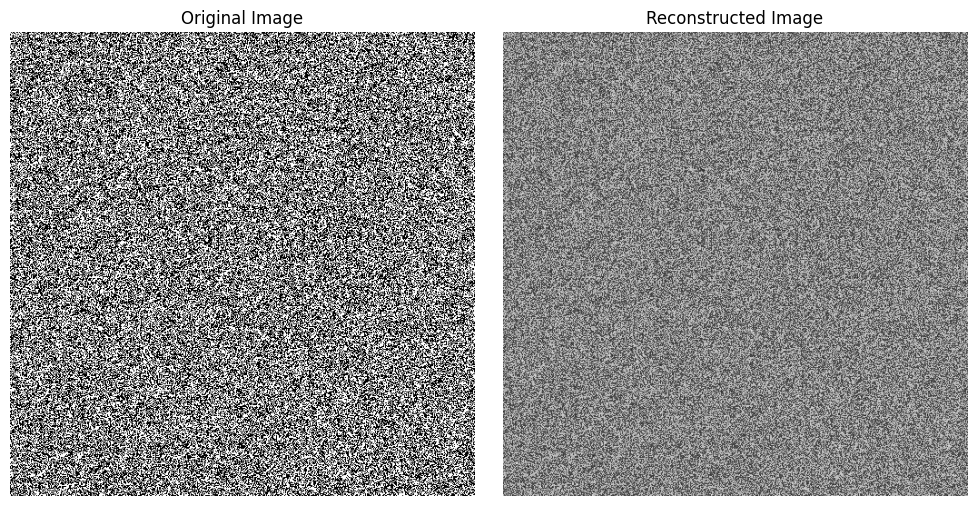

In [38]:
# so I think 270 is the best value we can apply
# Retain the first 270 singular values for each channel
#num_singular_values = 270
U_b = U_b[:, :num_singular_values_blue]
S_b = S_b[:num_singular_values_blue]
Vt_b = Vt_b[:num_singular_values_blue, :]

U_g = U_g[:, :num_singular_values_green]
S_g = S_g[:num_singular_values_green]
Vt_g = Vt_g[:num_singular_values_green, :]

U_r = U_r[:, :num_singular_values_red]
S_r = S_r[:num_singular_values_red]
Vt_r = Vt_r[:num_singular_values_red, :]


# Reconstruct the color matrices using U, S, and Vt
reconstructed_blue_channel = U_b @ np.diag(S_b) @ Vt_b
reconstructed_green_channel = U_g @ np.diag(S_g) @ Vt_g
reconstructed_red_channel = U_r @ np.diag(S_r) @ Vt_r

reconstructed_blue_channel = (reconstructed_blue_channel - np.min(reconstructed_blue_channel)) / (np.max(reconstructed_blue_channel) - np.min(reconstructed_blue_channel))
reconstructed_green_channel = (reconstructed_green_channel - np.min(reconstructed_green_channel)) / (np.max(reconstructed_green_channel) - np.min(reconstructed_green_channel))
reconstructed_red_channel = (reconstructed_red_channel - np.min(reconstructed_red_channel)) / (np.max(reconstructed_red_channel) - np.min(reconstructed_red_channel))

# Stack the color channels to form the reconstructed color image
reconstructed_image = np.stack(
    (reconstructed_red_channel, reconstructed_green_channel, reconstructed_blue_channel),
    axis=-1
).astype(np.float32)  # Convert to float32

# Plot the original and reconstructed images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image)
plt.axis('off')

plt.tight_layout()
plt.show()